### We will try to classify the famous Fashion MNIST data set using 3 or rather 4 separate algorithms using the sklearn libraries and find out their training time, testing time and compare their performances.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [110]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [111]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

### We will prepare our data set to support the functions used below for various algorithms, reshaping it lower dimensions.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
trainX.shape

## Reeshape
nsamples, nx, ny = trainX.shape
log_trainX = trainX.reshape((nsamples,nx*ny))

test_samples, testx, testy = testX.shape
log_testX = testX.reshape((test_samples,testx*testy))

### Lets print the first 10 datasets and their labels together to get the idea of the images

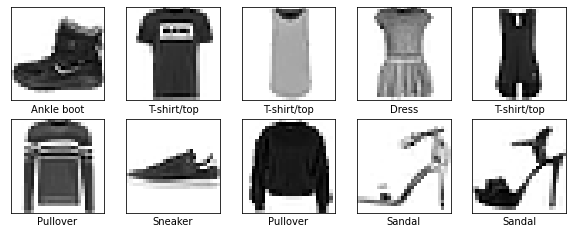

In [113]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

#### 1) k-NN, here 4 nearest neighbors.

In [0]:
## save all the scores here.
scores = []

In [115]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
%time neigh.fit(log_trainX, trainY)

CPU times: user 10.5 s, sys: 79.6 ms, total: 10.5 s
Wall time: 10.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [116]:
print(testY)
%time predictions = neigh.predict(log_testX)
score = neigh.score(log_testX, testY)
print("Score is %s" % (score))

# Showing predictins for top 10 data sets
for i in range(10):
    print("Test and Prediction")
    print(testY[i])
    print(predictions[i])

[9 2 1 ... 8 1 5]
CPU times: user 13min 56s, sys: 45.8 ms, total: 13min 56s
Wall time: 13min 56s
Score is 0.8577
Test and Prediction
9
9
Test and Prediction
2
2
Test and Prediction
1
1
Test and Prediction
1
1
Test and Prediction
6
6
Test and Prediction
1
1
Test and Prediction
4
4
Test and Prediction
6
6
Test and Prediction
5
5
Test and Prediction
7
7


In [0]:
## save the score
scores.append(score)


#### 2) Logistic Regression, 

In [120]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression(penalty='l2',tol=0.1,solver='saga',C=0.001)
%time logisticReg.fit(log_trainX, trainY)

CPU times: user 9.09 s, sys: 62 ms, total: 9.15 s
Wall time: 9.16 s


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [121]:
%time predictions = logisticReg.predict(log_testX)
score = logisticReg.score(log_testX,testY)
print(score)
scores.append(score)

CPU times: user 41.9 ms, sys: 13 ms, total: 54.9 ms
Wall time: 37.2 ms
0.8399


### Lets visualize the predictions on a map for the first 10 objects.

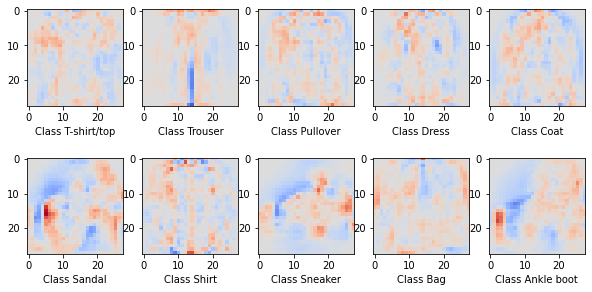

In [122]:
def plot_weights(coef):
    plt.figure(figsize=(10,5))
    scale = np.abs(coef).max()
    for i in range(10):
        l2_plot = plt.subplot(2,5,i+1)
        l2_plot.imshow(coef[i].reshape(28,28), vmin = -scale, vmax = scale, cmap=plt.cm.coolwarm)
        l2_plot.set_xlabel('Class %s' % class_names[i])

coef = logisticReg.coef_.copy()
plot_weights(coef)


#### 3) Support Vector Machines

**SVM** (linear)

In [131]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',gamma='auto', max_iter=1000)
%time clf.fit(log_trainX, trainY)

CPU times: user 5min 20s, sys: 56 ms, total: 5min 20s
Wall time: 5min 20s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
scores.append(clf.score(log_testX, testY))
%time print(clf.predict(log_testX))
print("Score ", clf.score(log_testX, testY))

[9 2 1 ... 8 1 5]
CPU times: user 2min 20s, sys: 14 ms, total: 2min 20s
Wall time: 2min 20s
Score  0.6844


**SVM** (Kernel RBF)

In [149]:
clf_rbf = SVC(kernel='rbf')
%time clf_rbf.fit(log_trainX, trainY)

CPU times: user 10min 54s, sys: 318 ms, total: 10min 55s
Wall time: 10min 55s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [150]:
scores.append(clf_rbf.score(log_testX, testY))
%time print(clf_rbf.predict(log_testX))

print("Score ", clf_rbf.score(log_testX, testY))

[9 2 1 ... 8 1 5]
CPU times: user 3min 55s, sys: 23 ms, total: 3min 55s
Wall time: 3min 55s
Score  0.8828


### Let's print the best Train-Test performances (Score)

In [151]:
print("Best performance comes for %s" % (max(scores)))

Best performance comes for 0.8828


### Now finally comparing the Train and Test-running time in a performance table

In [3]:
df = pd.DataFrame(index=["KNN","Logistic Regression","SVM Linear", "SVM RBF"], data={"Training Time": ["10.6s", "9.19s", "5min 56s", "10min 18s"],"Testing Time": ["13min 56s", "37.2ms", "2min 20s", "3min 55s"], "Score": ["85.77","83.99","68.44","88.28"]})
df

,Training Time,Testing Time,Score
KNN,10.6s,13min 56s,85.77
Logistic Regression,9.19s,37.2ms,83.99
SVM Linear,5min 56s,2min 20s,68.44
SVM RBF,10min 18s,3min 55s,88.28


Overall,
1.  Logistic Regression has the best time for training and for testing.
2.  SVM takes the most amount of time for training but lesser time for testing as compared to KNN.
3.  KNN takes the largest time for testing.

